<a href="https://colab.research.google.com/github/atharvmendhe18/Synapse_LP/blob/week1/Copy_of_SynapseWeekOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synapse Week One**

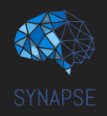

Welcome to Synapse!

Your first task as an ML Developer in this committee is to clear your Exploratory Data Analysis (EDA) concepts. We'll start from the very basics, and make it just a teeny lil bit more complex with every next code cell.

I suppose a nice place to start with would be the definition of EDA. Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualisation methods.

Above each code cell, instructions and resources have been given. Go through the resources, then implement the code accordingly. Feel free to add extra cells to play around on your own as well :p

#installing libraries and importing them

Some libraries like numpy and pandas are already pre installed on Colab. Some need to explicitly installed. A really cool data exploration library called ydata-profiling falls in the latter category. So we use the appropriate pip command to install it.

In [ ]:
!pip install ydata-profiling -q

Mount your Google Drive onto this notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import basic libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

#loading the dataset

The dataset we wanna nitpick apart this week is one pertaining to crabs. Use this link to download it:

https://drive.google.com/drive/folders/1DqJB3_B-8WyS9z-oEQJm1ayHJalb3xFv?usp=sharing

Upload it to your Google Drive. Then read it into a variable using the pandas library.

In [ ]:
# read dataset into a variable
df = pd.read_csv("drive/MyDrive/Copy_of_train.csv")

In [ ]:
df

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0          0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1          1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2          2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3          3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4          4   I  1.2500    1.0125  0.3375  23.289114       11.977664   
...      ...  ..     ...       ...     ...        ...             ...   
74046  74046   F  1.6625    1.2625  0.4375  50.660556       20.680960   
74047  74047   I  1.0750    0.8625  0.2750  10.446791        4.323299   
74048  74048   F  1.4875    1.2000  0.4125  29.483480       12.303683   
74049  74049   I  1.2125    0.9625  0.3125  16.768729        8.972617   
74050  74050   I  0.9125    0.6750  0.2000   5.386405        2.055339   

       Viscera Weight  Shell Weight  Age  
0            6.647958      8.348928    9  
1            2.324659      3.401940    8  
2            5.556502      6.662133    9  
3           10.991839     14.996885   11  
4            4.507570      5.953395    8  
...               ...           ...  ...  
74046       10.361742     12.332033   10  
74047        2.296310      3.543687    6  
74048        7.540967      8.079607   10  
74049        2.919999      4.280774    8  
74050        1.034757      1.700970    6  

[74051 rows x 10 columns]

View the first 5 rows of this DataFrame to see if it has been stored correctly.

In [ ]:
# write code here
df.head()

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926   
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745   
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800   
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941   
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664   

   Viscera Weight  Shell Weight  Age  
0        6.647958      8.348928    9  
1        2.324659      3.401940    8  
2        5.556502      6.662133    9  
3       10.991839     14.996885   11  
4        4.507570      5.953395    8

Right, so now you have your entire DataFrame residing in a variable. But again, what even is a DataFrame? Just speed through the below article.

https://www.databricks.com/glossary/what-are-dataframes



#basic EDA

Here, we aim to get a basic overview of the dataset.


List the columns in this dataset.

In [ ]:
# write code here
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

You may have noticed that the 'id' column is just indexing the rows in the DataFrame. But we don't really need that, as pandas very neatly handles that for us. So drop that column.

In [ ]:
# drop the column, then view its first 5 valued
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
df

Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0       I  1.5250    1.1750  0.3750  28.973189       12.728926   
1       I  1.1000    0.8250  0.2750  10.418441        4.521745   
2       M  1.3875    1.1125  0.3750  24.777463       11.339800   
3       F  1.7000    1.4125  0.5000  50.660556       20.354941   
4       I  1.2500    1.0125  0.3375  23.289114       11.977664   
...    ..     ...       ...     ...        ...             ...   
74046   F  1.6625    1.2625  0.4375  50.660556       20.680960   
74047   I  1.0750    0.8625  0.2750  10.446791        4.323299   
74048   F  1.4875    1.2000  0.4125  29.483480       12.303683   
74049   I  1.2125    0.9625  0.3125  16.768729        8.972617   
74050   I  0.9125    0.6750  0.2000   5.386405        2.055339   

       Viscera Weight  Shell Weight  Age  
0            6.647958      8.348928    9  
1            2.324659      3.401940    8  
2            5.556502      6.662133    9  
3           10.991839     14.996885   11  
4            4.507570      5.953395    8  
...               ...           ...  ...  
74046       10.361742     12.332033   10  
74047        2.296310      3.543687    6  
74048        7.540967      8.079607   10  
74049        2.919999      4.280774    8  
74050        1.034757      1.700970    6  

[74051 rows x 9 columns]

Display the the number of rows and columns in this dataset.

In [ ]:
# write code here
print(len(df), len(df.columns))

74051 9


Use the info() function to get, well, info about it.

In [ ]:
# write code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


If done correctly, you'll encounter no null values. How lucky.

What are the statistics of this data? Use describe() function to view them. Google what each of those row headers mean.

In [ ]:
# write code here
df.describe()

Length      Diameter        Height        Weight  Shucked Weight  \
count  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000   
mean       1.317460      1.024496      0.348089     23.385217       10.104270   
std        0.287757      0.237396      0.092034     12.648153        5.618025   
min        0.187500      0.137500      0.000000      0.056699        0.028349   
25%        1.150000      0.887500      0.300000     13.437663        5.712424   
50%        1.375000      1.075000      0.362500     23.799405        9.908150   
75%        1.537500      1.200000      0.412500     32.162508       14.033003   
max        2.012815      1.612500      2.825000     80.101512       42.184056   

       Viscera Weight  Shell Weight           Age  
count    74051.000000  74051.000000  74051.000000  
mean         5.058386      6.723870      9.967806  
std          2.792729      3.584372      3.175189  
min          0.042524      0.042524      1.000000  
25%          2.863300      3.968930      8.000000  
50%          4.989512      6.931453     10.000000  
75%          6.988152      9.071840     11.000000  
max         21.545620     28.491248     29.000000

Write a function to print all the unique values in the columns of Sex and Age.

In [ ]:
# write code here

def print_unique_values(df):

  unique_age = set({})
  unique_sex = set({})

  for sex in df.values[:,0]:
    unique_sex.add(sex)

  for age in df.values[:,8]:
    unique_age.add(age)

  print(unique_sex, unique_age)

print_unique_values(df)

{'I', 'F', 'M'} {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29}


List out the number of crabs belonging to each gender.

In [ ]:
# write code here
df['Sex'].value_counts()

M    27084
I    23933
F    23010
Name: Sex, dtype: int64

If your output is correct, you'll find the dataset is decently well-balanced, although it is a bit skewed towards male crabs.

#pandas profiling

Doing all the above for each dataset in separate cells gets boring fast. Enter ydata_profiling. You just have to feed a DataFrame to it, and it takes care of basic EDA (and then some more) for you. Resource:

https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/quickstart.html

Run a Profile Report on our dataframe and just go through it.

In [ ]:
# write code here
profile = pp.ProfileReport(df, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A lot of what we did above manually gets handled automatically. Pretty cool, innit?

Also, if you genuinely went through the report, you'll find that some crabs have height as zero. That doesn't make much sense.

Drop all these apparently two dimensional crabs from the dataset. Get rid of all rows where height is zero.

In [ ]:
# drop the necessary rows as asked above
df = df[df['Height'] > 0]

If done correctly, your DataFrame now will have shape (74027, 9). Check that below.

In [ ]:
# write code here
df.shape

(74027, 9)

#plotting some stuff out

To explore data properly, data visualisation techniques are employed. What that essentially means that we're gonna plot some graphs and glean meaningful insights from them. We use the matplotlib library for this, and seaborn to make it look real pretty, for no one likes an ugly graph.




#bar charts

Plot a bar graph to view the average age of each sex. For help, refer:

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

In [ ]:
# write the logic here before you actually plot the graph
grouped_sex = df.groupby(['Sex'])

In [ ]:
average_age = grouped_sex['Age'].mean()

x axis will contain Sex, and y axis has the average age.

<BarContainer object of 3 artists>

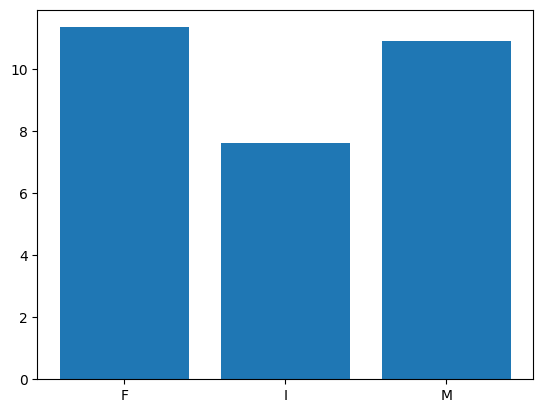

In [ ]:
# plot the graph here
plt.bar(average_age.index, average_age.values)

As with humans, it seems that crabs have their female sex having longer lives on average. Still, all genders have a pretty short lifespan. Shame.  

Anyways, the above bar graph of Average Age and Sex is not the most comprehensive way to analyse such data.

#box plots

To get what I mean, make a boxplot of Age and Sex. Again, refer to these before you code:

https://www.youtube.com/watch?v=Vo-bfTqEFQk

https://builtin.com/data-science/boxplot



<Axes: xlabel='Sex', ylabel='Age'>

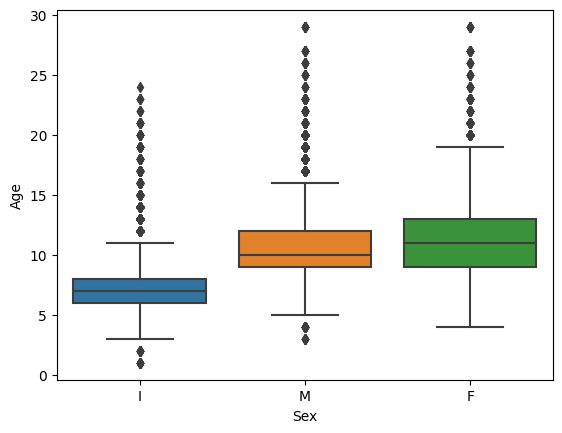

In [ ]:
# plot the graph here
sns.boxplot(x = 'Sex', y = 'Age', data = df)

Bar charts usually just tell you the count of some items in a dataset. While that is useful, it doesn't really say much about the distribution of those items in that dataset. That's where boxplots come in: to tell you the characteristics of data. For more information:

https://www.nature.com/articles/nmeth.2807

#KDE plots

Now, we'll graph some of the other numeric data with age to try and get more information about it all relates. Display KDE plots of Age, Length, and Weight. For resources about a KDE plot:

https://www.youtube.com/watch?v=DCgPRaIDYXA

https://datagy.io/seaborn-kdeplot/

Don't make three separate cells for each of these plots. All three plots should be visible in a single row.

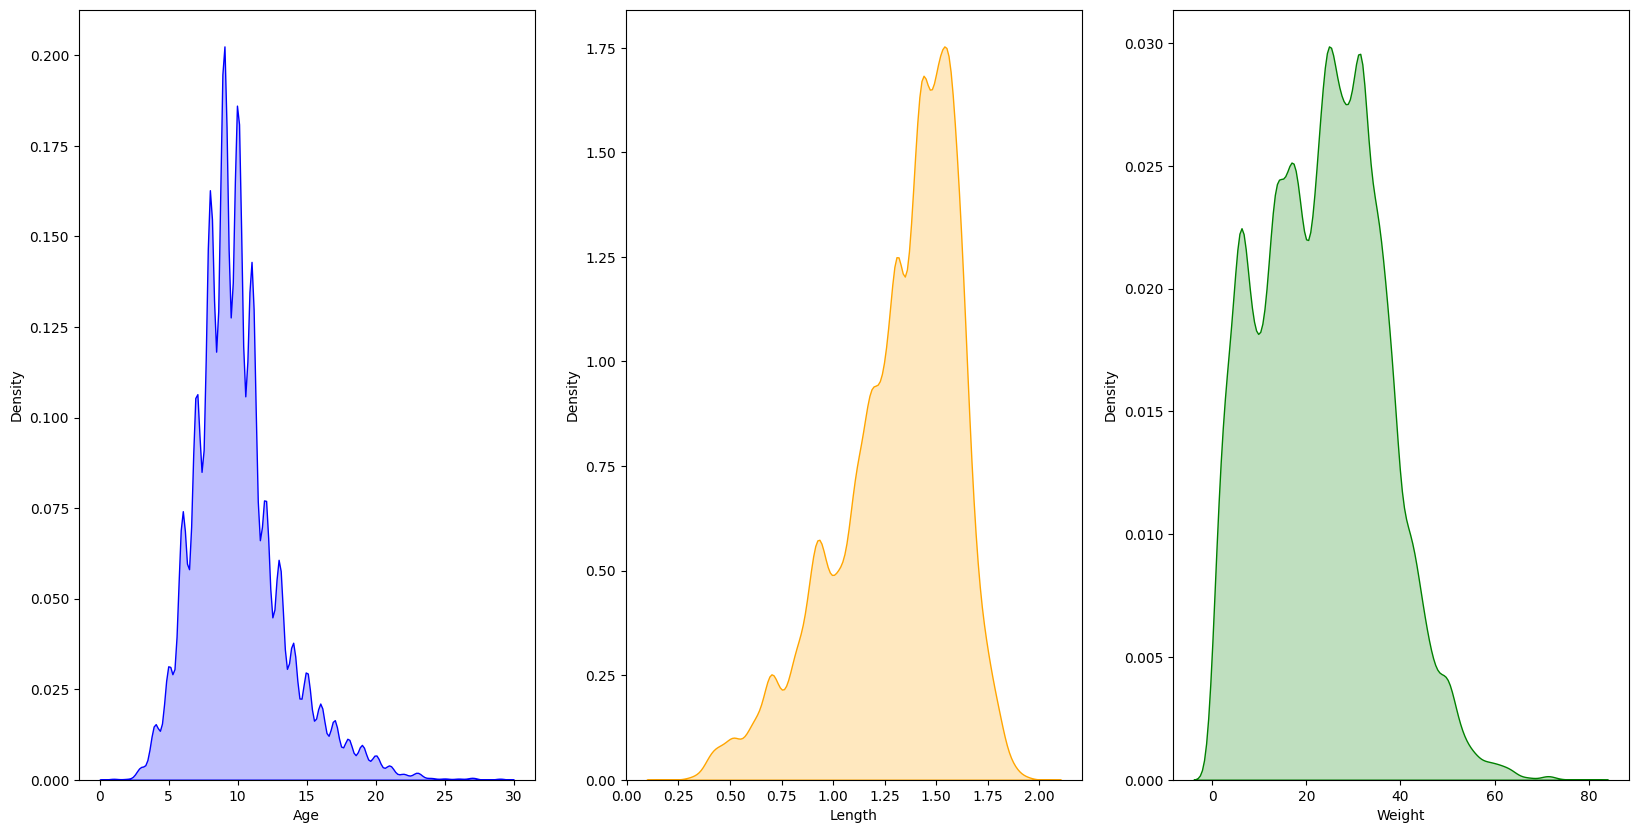

In [ ]:
# write code that yields output similar to the one shown below

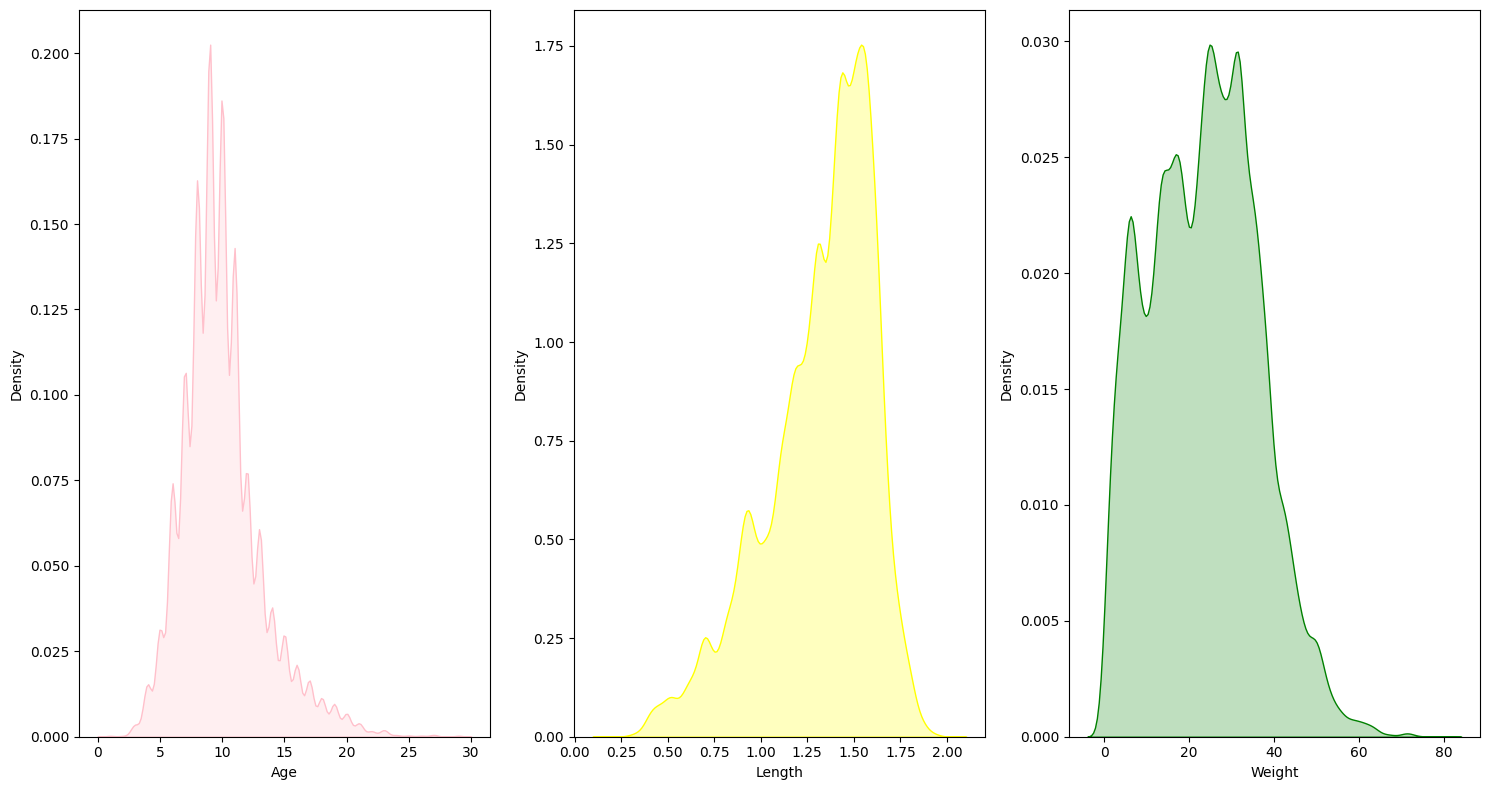

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
sns.kdeplot(data=df['Age'], ax=axes[0], fill = True, color = 'pink')
sns.kdeplot(data=df['Length'], ax=axes[1], fill = True, color = 'yellow')
sns.kdeplot(data=df['Weight'], ax=axes[2], fill = True, color = 'green')
plt.tight_layout()
plt.show()

#scatter plots

Make a scatterplot between Age and Diameter. Resources for the same:

https://www.youtube.com/watch?v=4yz4cMXCkuw

https://www.cuemath.com/data/scatter-plot/

<Axes: xlabel='Age', ylabel='Diameter'>

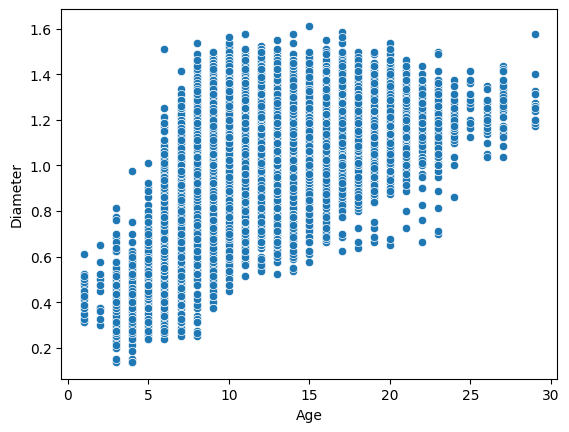

In [ ]:
# plot the graph here
sns.scatterplot(x='Age', y = 'Diameter', data = df)

# some more complex analysis

Use a function called corr(). Resource:

https://data36.com/correlation-definition-calculation-corr-pandas/



In [ ]:
# write code here
df.corr()

<ipython-input-9-90a478247296>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Length  Diameter    Height    Weight  Shucked Weight  \
Length          1.000000  0.989437  0.918352  0.936374        0.915516   
Diameter        0.989437  1.000000  0.921353  0.938249        0.914199   
Height          0.918352  0.921353  1.000000  0.901775        0.864083   
Weight          0.936374  0.938249  0.901775  1.000000        0.971267   
Shucked Weight  0.915516  0.914199  0.864083  0.971267        1.000000   
Viscera Weight  0.917855  0.918351  0.883127  0.971062        0.942626   
Shell Weight    0.916957  0.922688  0.903398  0.965525        0.910398   
Age             0.612843  0.621256  0.638067  0.601195        0.503320   

                Viscera Weight  Shell Weight       Age  
Length                0.917855      0.916957  0.612843  
Diameter              0.918351      0.922688  0.621256  
Height                0.883127      0.903398  0.638067  
Weight                0.971062      0.965525  0.601195  
Shucked Weight        0.942626      0.910398  0.503320  
Viscera Weight        1.000000      0.933919  0.576808  
Shell Weight          0.933919      1.000000  0.663473  
Age                   0.576808      0.663473  1.000000

If you've been paying attention, the Profile Report above already took care of this. This table basically tells you how every column correlate with each other. Closer the number is to 1, the more they mirror each other.

From this report, it can be seen that Weight is extremely highly correlated with each of shucked weight, viscera weight and shell weight.

To actually understand what this means, we first need to know what all this crab jargon actually is. So, on Googling, you will discover the following meanings:

*   Weight - total teight
*   Shucked - weight of meat only
*   Viscera - gut weight, after bleeding
*   Shell - weight after being dried

Well, those are some pretty disgusting and gory definitions.

Moving past that, we here find that some weight statistics is lost. What about the other potential body parts of a crab? Maybe we need them to accurately predict its (apparently very short) lifespan? Maybe it is actually needed in some future model we choose to implement?

So, make a new column called "Lost Weight". Use the following formula to populate every row of it:



```
Weight - (Shucked + Viscera + Shell)
```


If this operation gives a value of Lost Weight that is less than or equal to zero, then assign zero to that row's Lost Weight value. Otherwise, assign one to it.

In [ ]:
df

Sex  Length  Diameter  Height     Weight  Shucked Weight  \
0       I  1.5250    1.1750  0.3750  28.973189       12.728926   
1       I  1.1000    0.8250  0.2750  10.418441        4.521745   
2       M  1.3875    1.1125  0.3750  24.777463       11.339800   
3       F  1.7000    1.4125  0.5000  50.660556       20.354941   
4       I  1.2500    1.0125  0.3375  23.289114       11.977664   
...    ..     ...       ...     ...        ...             ...   
74046   F  1.6625    1.2625  0.4375  50.660556       20.680960   
74047   I  1.0750    0.8625  0.2750  10.446791        4.323299   
74048   F  1.4875    1.2000  0.4125  29.483480       12.303683   
74049   I  1.2125    0.9625  0.3125  16.768729        8.972617   
74050   I  0.9125    0.6750  0.2000   5.386405        2.055339   

       Viscera Weight  Shell Weight  Lost Weight  Age  
0            6.647958      8.348928            1    9  
1            2.324659      3.401940            1    8  
2            5.556502      6.662133            1    9  
3           10.991839     14.996885            1   11  
4            4.507570      5.953395            1    8  
...               ...           ...          ...  ...  
74046       10.361742     12.332033            1   10  
74047        2.296310      3.543687            1    6  
74048        7.540967      8.079607            1   10  
74049        2.919999      4.280774            1    8  
74050        1.034757      1.700970            1    6  

[74051 rows x 10 columns]

Also, ensure that this column is added in between Shell Weight and Age.

In [ ]:
df.insert(8, "Lost Weight", np.where(((df['Weight'] - (df['Shucked Weight'] - df['Viscera Weight'] - df['Shell Weight'])) <= 0), 0 , 1))

To see how the crabs having no Lost Weight compare with those having some with respect to age, lets draw a violin plot. Resources:

https://www.youtube.com/watch?v=PNNLefP974M

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Code it below now. Here, x is the Lost Weight, and y is the Age.

<Axes: xlabel='Lost Weight', ylabel='Age'>

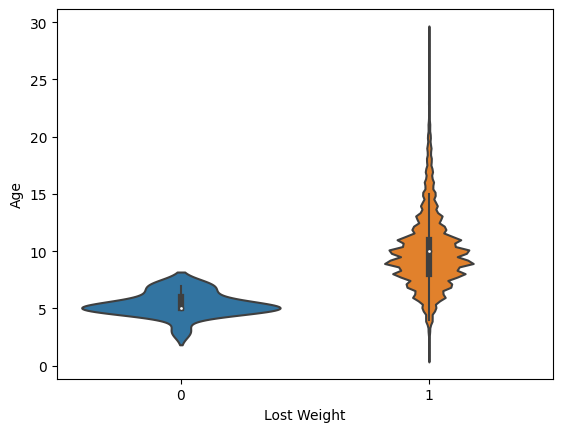

In [ ]:
# plot the graph here
sns.violinplot(x='Lost Weight', y = 'Age', data = df )

#make a plot of your own choosing!

Below is a link to the gallery of various plots available in seaborn.

https://seaborn.pydata.org/examples/index.html

You have free rein to make any type of graph (that should not be what we have exactly done above), between any parameters you want to compare. Make it real eye candy to look at, and also below that plot write what relevant insight you obtained from it.

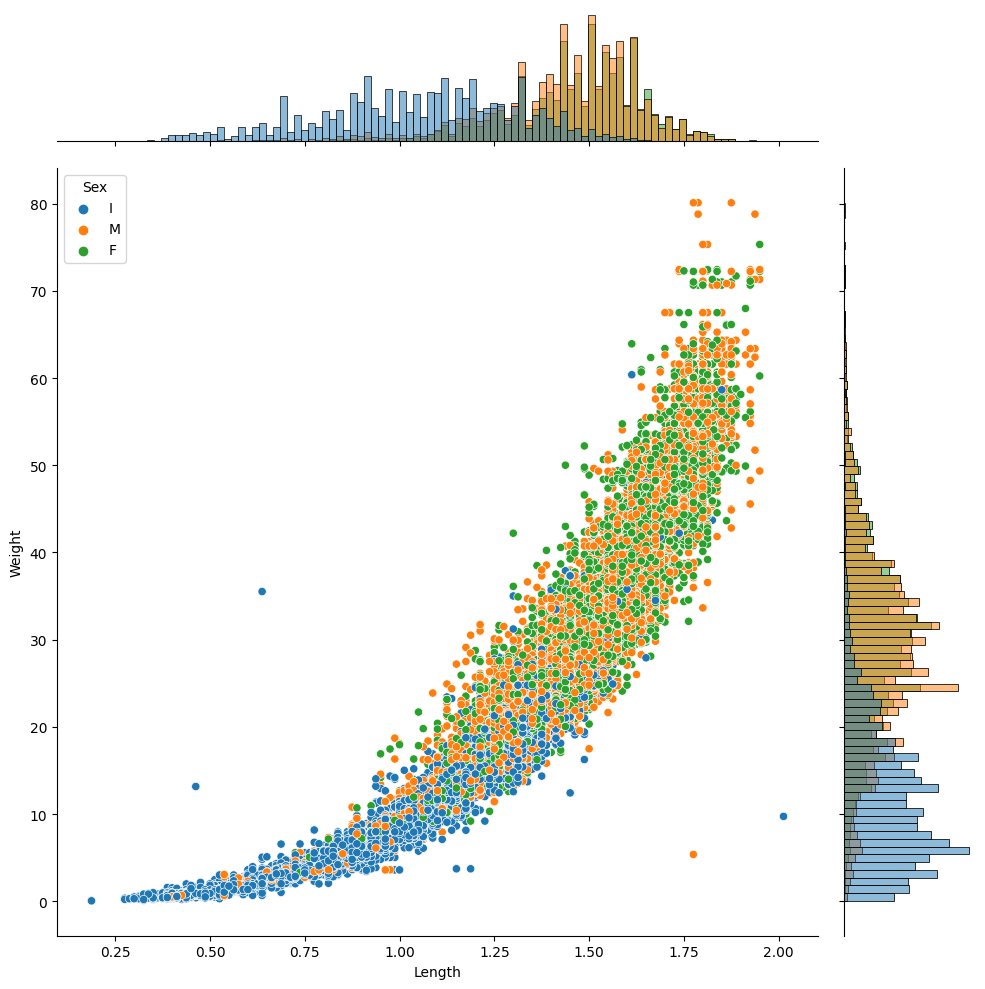

In [ ]:
# creativity batao
g = sns.JointGrid(data = df,x='Length', y = 'Weight', hue = 'Sex', height = 10)
g.plot(sns.scatterplot, sns.histplot)

Length vs Weight looks like a Exponential curve. The histogram shows that data has high density around weight 30-40 and lenght around 1.25 - 1.50.


#one hot encoding

Machine Learning algorithms can only crunch numbers. Give it a string or text input, and it self-annihilates by throwing an error. To handle this, we use a technique called one hot encoding. Read up on it here:

https://datagy.io/pandas-get-dummies/

Then, apply it to the column titled "Sex."

In [ ]:
# write code here
df_encoded = pd.get_dummies(columns=["Sex"], data = df)

In [ ]:
df_encoded

Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0      1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1      1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2      1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3      1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4      1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   
...       ...       ...     ...        ...             ...             ...   
74046  1.6625    1.2625  0.4375  50.660556       20.680960       10.361742   
74047  1.0750    0.8625  0.2750  10.446791        4.323299        2.296310   
74048  1.4875    1.2000  0.4125  29.483480       12.303683        7.540967   
74049  1.2125    0.9625  0.3125  16.768729        8.972617        2.919999   
74050  0.9125    0.6750  0.2000   5.386405        2.055339        1.034757   

       Shell Weight  Lost Weight  Age  Sex_F  Sex_I  Sex_M  
0          8.348928            1    9      0      1      0  
1          3.401940            1    8      0      1      0  
2          6.662133            1    9      0      0      1  
3         14.996885            1   11      1      0      0  
4          5.953395            1    8      0      1      0  
...             ...          ...  ...    ...    ...    ...  
74046     12.332033            1   10      1      0      0  
74047      3.543687            1    6      0      1      0  
74048      8.079607            1   10      1      0      0  
74049      4.280774            1    8      0      1      0  
74050      1.700970            1    6      0      1      0  

[74051 rows x 12 columns]

If correctly implemented, you will observe three new columns are added, namely, "Sex_F", "Sex_I" and "Sex_M." The old "Sex" column is now gone.

#normalisation and standardisation

To prevent some data features from dominating the model training process, we implement the above two feature scaling techniques.

Go through the below resource:

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Normalise the dataset.

In [ ]:
# plot the graph here

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_normal = scaler.fit_transform(df_encoded)

In [ ]:
df_normal = pd.DataFrame(df_normal, columns = df_encoded.columns)

In [ ]:
df_normal

Length  Diameter    Height    Weight  Shucked Weight  Viscera Weight  \
0      0.732750  0.703390  0.132743  0.361254        0.301278        0.307185   
1      0.499914  0.466102  0.097345  0.129449        0.106590        0.106131   
2      0.657421  0.661017  0.132743  0.308837        0.268325        0.256427   
3      0.828624  0.864407  0.176991  0.632194        0.482179        0.509197   
4      0.582091  0.593220  0.119469  0.290243        0.283457        0.207647   
...         ...       ...       ...       ...             ...             ...   
74046  0.808080  0.762712  0.154867  0.632194        0.489913        0.479895   
74047  0.486218  0.491525  0.097345  0.129803        0.101883        0.104812   
74048  0.712206  0.720339  0.146018  0.367629        0.291190        0.348715   
74049  0.561547  0.559322  0.110619  0.208783        0.212172        0.133817   
74050  0.397192  0.364407  0.070796  0.066584        0.048083        0.046144   

       Shell Weight  Lost Weight       Age  Sex_F  Sex_I  Sex_M  
0          0.291978          1.0  0.285714    0.0    1.0    0.0  
1          0.118087          1.0  0.250000    0.0    1.0    0.0  
2          0.232686          1.0  0.285714    0.0    0.0    1.0  
3          0.525660          1.0  0.357143    1.0    0.0    0.0  
4          0.207773          1.0  0.250000    0.0    1.0    0.0  
...             ...          ...       ...    ...    ...    ...  
74046      0.431988          1.0  0.321429    1.0    0.0    0.0  
74047      0.123069          1.0  0.178571    0.0    1.0    0.0  
74048      0.282511          1.0  0.321429    1.0    0.0    0.0  
74049      0.148979          1.0  0.250000    0.0    1.0    0.0  
74050      0.058296          1.0  0.178571    0.0    1.0    0.0  

[74051 rows x 12 columns]

For standardisation, bear in mind that the one hot encoded columns are not standardised. They are categorical in nature, so it makes no sense to shoehorn them into any type of distribution at all.

But, its ok to normalise them, as it will be scaled down to values between 0 and 1, which is the range in which they already exist anyways. Normalisation doesn't affect them.

In [ ]:
df_std = pd.read_csv("drive/MyDrive/Copy_of_train.csv")
# one hot encode the Sex column before running the next cell

In [ ]:
df_std = pd.get_dummies(columns=["Sex"], data = df_std)

In [ ]:
df_std.drop(['id'],inplace = True, axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_std

Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0      1.5250    1.1750  0.3750  28.973189       12.728926        6.647958   
1      1.1000    0.8250  0.2750  10.418441        4.521745        2.324659   
2      1.3875    1.1125  0.3750  24.777463       11.339800        5.556502   
3      1.7000    1.4125  0.5000  50.660556       20.354941       10.991839   
4      1.2500    1.0125  0.3375  23.289114       11.977664        4.507570   
...       ...       ...     ...        ...             ...             ...   
74046  1.6625    1.2625  0.4375  50.660556       20.680960       10.361742   
74047  1.0750    0.8625  0.2750  10.446791        4.323299        2.296310   
74048  1.4875    1.2000  0.4125  29.483480       12.303683        7.540967   
74049  1.2125    0.9625  0.3125  16.768729        8.972617        2.919999   
74050  0.9125    0.6750  0.2000   5.386405        2.055339        1.034757   

       Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0          8.348928    9      0      1      0  
1          3.401940    8      0      1      0  
2          6.662133    9      0      0      1  
3         14.996885   11      1      0      0  
4          5.953395    8      0      1      0  
...             ...  ...    ...    ...    ...  
74046     12.332033   10      1      0      0  
74047      3.543687    6      0      1      0  
74048      8.079607   10      1      0      0  
74049      4.280774    8      0      1      0  
74050      1.700970    6      0      1      0  

[74051 rows x 11 columns]

Standardise df_std such that the one hot label encoded columns aren't affected.

In [ ]:
# write code here
numeric_columns = ['Length','Diameter','Weight','Shucked Weight','Viscera Weight','Viscera Weight', 'Age']
stdscaler = StandardScaler()

for i in numeric_columns:
  df_std[i] = stdscaler.fit_transform(np.array(df_std[i]).reshape(-1,1))


In [ ]:
df_std

Length  Diameter  Height    Weight  Shucked Weight  Viscera Weight  \
0      0.721238  0.633982  0.3750  0.441804        0.467188        0.569186   
1     -0.755712 -0.840356  0.2750 -1.025198       -0.993688       -0.978880   
2      0.243401  0.370707  0.3750  0.110076        0.219924        0.178363   
3      1.329394  1.634426  0.5000  2.156483        1.824616        2.124622   
4     -0.234435 -0.050532  0.3375 -0.007598        0.333464       -0.197233   
...         ...       ...     ...       ...             ...             ...   
74046  1.199075  1.002567  0.4375  2.156483        1.882648        1.899000   
74047 -0.842591 -0.682391  0.2750 -1.022957       -1.029011       -0.989031   
74048  0.590919  0.739292  0.4125  0.482150        0.391495        0.888951   
74049 -0.364754 -0.261152  0.3125 -0.523122       -0.201434       -0.765703   
74050 -1.407307 -1.472215  0.2000 -1.423048       -1.432707       -1.440762   

       Shell Weight       Age  Sex_F  Sex_I  Sex_M  
0          8.348928 -0.304805      0      1      0  
1          3.401940 -0.619749      0      1      0  
2          6.662133 -0.304805      0      0      1  
3         14.996885  0.325083      1      0      0  
4          5.953395 -0.619749      0      1      0  
...             ...       ...    ...    ...    ...  
74046     12.332033  0.010139      1      0      0  
74047      3.543687 -1.249637      0      1      0  
74048      8.079607  0.010139      1      0      0  
74049      4.280774 -0.619749      0      1      0  
74050      1.700970 -1.249637      0      1      0  

[74051 rows x 11 columns]

#**Bonus: You can research on the topic of One Hot Label Encoding vs Label Encoding only if you are done with the task. The best research may be edited and featured on the Synapse Instagram and LinkedIn pages. You can contact us for any doubts regarding this as well! Happy coding :)**

One Hot Label Encoding vs Label Encoding

One Hot Encoding -  One-hot encoding converts the categorical data into numeric data by splitting the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

Label Encoding - This approach is very simple and it involves converting each value in a column into a number.

I would like to start with an example of one hot encoding vs label encoding.To test which would perform better on a Linear Regression model I passed the same dataset to two models only difference being in one dataset one of the columns was label encodend and other was one hot encoded.

Performance of the Label Encoded model is:

R2 Score = 0.7483496201217792

MAE = 2.444092899146519

MSE = 12.350417868626065

RMSE =3.5143161310027398

And the performance of the one hot encoded model:

R2 Score = 1.0

MAE = 1.13132228572663e-14

MSE = 2.4054903349703162e-28

RMSE =1.5509643242093987e-14

It looks so perfect, R2 score of the model is 1 and errors are negligible, so of course it's wrong.
The reason for the above score is the Dummy Variable Trap.

The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

The solution to the dummy variable trap is to drop on the the dummy variable.
But in this case the column I one hot encoded only has two values 'Yes' or 'No'. So dropping of the dummy variable columns will we same as Label Encoding the orignal column.

Therefore for a Linear Regression or Logistic Regression model, one hot encoding the column which only has two categories is not recommended as it can lead to the above trap.

We apply one hot encoding when:

-The categorical feature is not ordinal

-The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

-The categorical feature is ordinal

-The number of categories is quite large as one-hot encoding can lead to high memory consumption

Code for the example shown above:

Label encoding -
https://colab.research.google.com/drive/1iR25Y4PnN_CF0D1vMS5-6Vz4U3L2qYUO?usp=share_link

One hot encoded - https://colab.research.google.com/drive/1OUWC5PkPnF1k0VyGho4PoXgo5wmHKJW6?usp=share_link